# Mutations in the population

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Mutation-Simulation" data-toc-modified-id="Mutation-Simulation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mutation Simulation</a></span></li><li><span><a href="#Inspect-data" data-toc-modified-id="Inspect-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Inspect data</a></span></li><li><span><a href="#Mutation-Simulation" data-toc-modified-id="Mutation-Simulation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mutation Simulation</a></span></li></ul></div>

In their paper from 1943, Luria and Delbruck showed by means of mathematical modeling that the distribution of bacteria resistant to viruses in different cultures can not be explained by an acquired immunity upon virus transfection, but is a consequence of random mutations occurring during the bacterial proliferation. Read the paper and simulate two hypotheses, i.e.
a “mutation hypothesis” and an “acquired immunity hypothesis”, outlined in the paper.

1. For each hypothesis, create a population of bacteria, i.e., a colony. For both hypotheses, you start with one wild type (WT) bacterium, i.e., a bacterium sensitive to the virus. It grows and divides into two “daughter” cells. The mutation hypothesis has an assumption that a mutation in any of WT daughter cells may occur with the probability of 10^-6. For the immunity hypothesis, no mutations occur. Daughter cells grow and each of them divides into two. For the mutation hypothesis, daughter cells inherit the mutant genotype of the “mother” cell: if the mother cell is a mutant, both daughter cells will be mutants. For each hypothesis, the colony grows until it gets the size of around 10^6.


2. Infect both colonies with the virus. For the immunity hypothesis, bacteria survive if they become resistance upon the contact with the virus. The resistance occurs with the
small probability, e. g. 10^-6. For the mutation hypothesis, only mutants survive.

## Imports

In [2]:
# Data manipulation
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Rectangle

## Mutation Simulation

In [3]:
def simulate(mutation_rate = 0.5):
    wild = 1
    immune = 0
    while immune+wild < 1000000:
        immune *= 2
        wild *= 2
        m = np.random.binomial(wild, mutation_rate)
        immune += m 
        wild -= m
    i_hyp = np.random.binomial(wild + immune , mutation_rate)
    return immune, wild, i_hyp

Plot a histogram of the number of resistant bacteria in 100 different colonies for both hypotheses. 

In [5]:
repetitions = 200
colonies = np.zeros((2, repetitions))

In [6]:
for rep in range(repetitions):
    a = simulate(1e-6)
    colonies[0][rep] = a[0]
    colonies[1][rep] = a[2]

2913.0


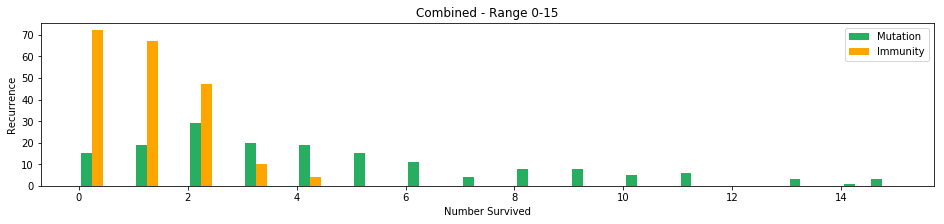

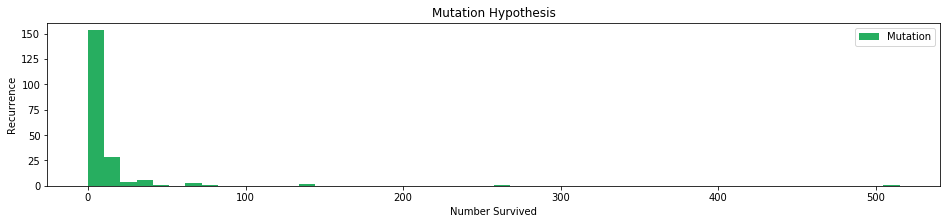

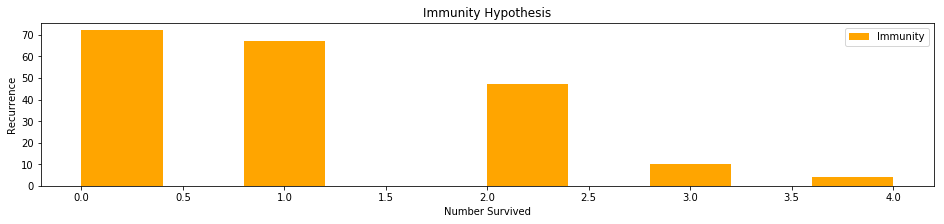

In [7]:
total = sum(colonies[0]+colonies[1])
print(total)
plt.figure(figsize=(16, 3))
plt.hist([colonies[0], colonies[1]], 30, label=[
         'Mutation', 'Immunity'], range=(0, 15), color=['#27ae60','orange'])
plt.ylabel('Recurrence')
plt.xlabel('Number Survived')
plt.title('Combined - Range 0-15')
plt.legend(prop={'size': 10})
plt.show()

plt.figure(figsize=(16, 3))
plt.hist(colonies[0], 50, label=['Mutation'], color='#27ae60')
plt.ylabel('Recurrence')
plt.xlabel('Number Survived')
plt.title('Mutation Hypothesis')
plt.legend(prop={'size': 10})
plt.show()

plt.figure(figsize=(16, 3))
plt.hist(colonies[1], label=['Immunity'], color='orange')
plt.ylabel('Recurrence')
plt.xlabel('Number Survived')
plt.title('Immunity Hypothesis')
plt.legend(prop={'size': 10})
plt.show()

## Inspect data

Calculate and plot the ratio of standard deviation to the average number of resistant bacteria in 100 different colonies for both hypotheses as well as for the theoretical ‘likely’ standard deviation divided by average (formula 12 in the paper). 

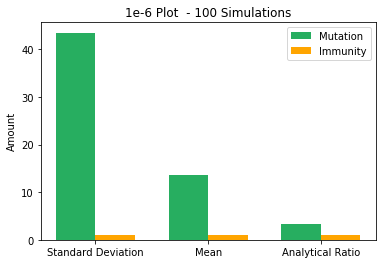

In [8]:
ticks = ['Standard Deviation', 'Mean', 'Analytical Ratio']
width = 0.35
y = np.arange(3)
mut = [colonies[0].std(), colonies[0].mean(),
       colonies[0].std()/colonies[0].mean()]
imm = [colonies[1].std(), colonies[1].mean(),
       colonies[1].std()/colonies[1].mean()]
plt.bar(y, mut, width, label='Mutation', color='#27ae60')
plt.bar(y+width, imm, width, label='Immunity', color='orange')
plt.xticks(y + width / 2, ticks)
plt.title('1e-6 Plot  - 100 Simulations')
plt.ylabel('Amount')
plt.legend(loc='best')
plt.show()

**Simply put**: More bacteria survived with heritable mutations.

## Mutation Simulation



What is the difference between ratios calculated for two hypotheses? Is the ratio of standard deviation to average indeed decreasing when you increase the mutation rate, as suggested by the theoretical formula? 

Plot this ratio for different mutations rates, e.g. 5x10^-7, 10^-6, 5x10^-6, 10^-5, 5x10^-5,.

**Answer**: We cannot be entirely sure but it seems to be decreasing.

 Note that in the simulation we neglected several processes, such as death of bacteria, differences in cell cycle duration, slowed growth due to reduction of the growth medium and
 reverting mutations to the sensitive bacteria.

In [21]:
mut_rates = [5e-9, 1e-9, 5e-8, 1e-8, 5e-7, 1e-7, 5e-6, 1e-6, 5e-5, 1e-5, 5e-4, 1e-4]
mut_rates2 = ['5e-9', '1e-9', '5e-8', '1e-8', '5e-7', '1e-7', '5e-6', '1e-6', '5e-5', '1e-5', '5e-4', '1e-4']
repetitions = 50000
colonies2 = np.zeros((2, repetitions, len(mut_rates)))

for rate in range(len(mut_rates)):
    for rep in range(repetitions):
        a = simulate([mut_rates[rate]])
        colonies2[0][rep][rate] = a[0]
        colonies2[1][rep][rate] = a[2]

In [22]:
ratios = np.std(colonies2, axis =1)/np.mean(colonies2, axis =1)
ratios

array([[4.64068030e+01, 3.03541279e+01, 3.40312049e+01, 5.19809100e+01,
        4.04927862e+01, 6.90880640e+01, 1.92892384e+01, 2.07825531e+01,
        7.36744009e+00, 1.41938888e+01, 2.19892121e+00, 4.67430229e+00],
       [1.37782326e+01, 3.29538544e+01, 4.41503723e+00, 9.68837641e+00,
        1.38783733e+00, 3.08879443e+00, 4.35904511e-01, 9.71246695e-01,
        1.37994865e-01, 3.09807113e-01, 4.37395561e-02, 9.76553774e-02]])

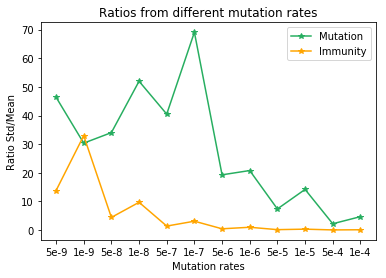

In [23]:
plt.plot(mut_rates2, ratios[0], '*-', label='Mutation', color='#27ae60')
plt.plot(mut_rates2, ratios[1], '*-', label='Immunity', color='orange')
plt.title('Ratios from different mutation rates')
plt.xlabel('Mutation rates')
plt.ylabel('Ratio Std/Mean')
plt.legend(loc='best')
plt.show()